In [234]:
#step 1 is to import libraries
!pip install pandas
!pip install scikit-learn matplotlib
!pip install numpy
!pip install imblearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [235]:
HurriData = pd.read_csv("atlantic.csv")
#have a variable to store the data you are reading

In [236]:
HurriData
#displays the data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,20151112,1200,,EX,41.3N,50.4W,55,981,...,180,120,120,120,60,0,0,0,0,0
49101,AL122015,KATE,20151112,1800,,EX,41.9N,49.9W,55,983,...,180,120,120,120,60,0,0,0,0,0
49102,AL122015,KATE,20151113,0,,EX,41.5N,49.2W,50,985,...,200,220,120,120,60,0,0,0,0,0
49103,AL122015,KATE,20151113,600,,EX,40.8N,47.5W,45,985,...,180,220,0,0,0,0,0,0,0,0


In [237]:
HurriData.info()
#All the rows have valid 'non-null' data so no need to clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Date              49105 non-null  int64 
 3   Time              49105 non-null  int64 
 4   Event             49105 non-null  object
 5   Status            49105 non-null  object
 6   Latitude          49105 non-null  object
 7   Longitude         49105 non-null  object
 8   Maximum Wind      49105 non-null  int64 
 9   Minimum Pressure  49105 non-null  int64 
 10  Low Wind NE       49105 non-null  int64 
 11  Low Wind SE       49105 non-null  int64 
 12  Low Wind SW       49105 non-null  int64 
 13  Low Wind NW       49105 non-null  int64 
 14  Moderate Wind NE  49105 non-null  int64 
 15  Moderate Wind SE  49105 non-null  int64 
 16  Moderate Wind SW  49105 non-null  int64 
 17  Moderate Win

In [238]:
HurriData.isnull().sum()

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [239]:
HurriData["Event"] = HurriData["Event"].str.strip()
#removing white space
HurriData["Event"].value_counts().get("L", 0)

903

In [240]:
#Exploring and cleaning the data 

#Checking for duplicates and missing values

duplicates = HurriData.duplicated(keep=False) #marks duplicates as True istead of 0's and 1's

#print(duplicates) 
#prints all false, so no duplicates in this data


#Record identifier ("Event" Column)

#C – Closest approach to a coast, not followed by a landfall
#G – Genesis
#I – An intensity peak in terms of both pressure and wind
#L – Landfall (center of system crossing a coastline)
#P – Minimum in central pressure
#R – Provides additional detail on the intensity of the cyclone when rapid changes are underway
#S – Change of status of the system
#T – Provides additional detail on the track (position) of the cyclone
#W – Maximum sustained wind speed

#Even though there are other record identifiers, we will focus on Landfall since it has the highest occurance

#Converting categorical variables(‘L’) into numerical format. 1 for landfall(‘L’) and 0 for no landfall.
HurriData["Event"] = HurriData["Event"].str.strip()
HurriData["Event"] = HurriData["Event"].apply(lambda x: 1 if x=="L" else 0)

#Changing Status using Ordinal Encoding

#Note:
#TD – Tropical cyclone of tropical depression intensity (< 34 knots) (1)
#TS – Tropical cyclone of tropical storm intensity (34-63 knots). (2)
#HU – Tropical cyclone of hurricane intensity (> 64 knots)   (3)

HurriData["Status"] = HurriData["Status"].str.strip()
#gets rid of the space in front of each symbol

HurriData["Status"] = HurriData["Status"].map({"LO":1, "SD":2, "SS":3, "WV":4, "DB":4, "TD":5, "TS":6, "EX":7, "HU":8})
#Rationale for each Rating
#TD - Tropical cyclone of tropical depression intensity (< 34 knots) -> low knots
#TS – Tropical cyclone of tropical storm intensity (34-63 knots)-> second lowest knots
#HU – Tropical cyclone of hurricane intensity (> 64 knots) -> Highest knots for Tropical cyclone and potential for very high wind speeds
#EX – Extratropical cyclone (of any intensity) -> lower winds than HU but the can cause heavy snowfall, rain & ice, and icestorms are dangerous.
#SD – Subtropical cyclone of subtropical depression intensity (< 34 knots) ->low knots & does less than TD
#SS – Subtropical cyclone of subtropical storm intensity (> 34 knots) -> does less than TD
#LO – A low that is neither a tropical cyclone, a subtropical cyclone,
# nor an extratropical cyclone (of any intensity) -> Not as dangerous and threatening as the others
#WV – Tropical Wave (of any intensity) -> can lead to forming Tropical Cyclone
#DB – Disturbance (of any intensity) -> Large(100-300 miles in diameter)

#Removing irrelevant columns like: ‘Name’, ‘ID’, & ‘Time’
drop = ['Name', 'ID', 'Time'] #creating an array with th columns I want to drop

HurriData.drop(drop, inplace = True, axis =1) #drop function for pandas.
#inplace=True modifies the original dataframe directly and returns non which is more memory-effiecient
#inplace=False creates a copy of the dataframe with the rows or columns dropped and returns that new one, leaving the old one unchanged
#axis=0 or axis='index' is for dropping rows
#axis=1 or axis='column' is dropping columns(What I'm doing)



HurriData #print

,Date,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,18510625,0,8,28.0N,94.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,18510625,0,8,28.0N,95.4W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,18510625,0,8,28.0N,96.0W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,18510625,0,8,28.1N,96.5W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,18510625,1,8,28.2N,96.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,20151112,0,7,41.3N,50.4W,55,981,220,220,180,120,120,120,60,0,0,0,0,0
49101,20151112,0,7,41.9N,49.9W,55,983,220,220,180,120,120,120,60,0,0,0,0,0
49102,20151113,0,7,41.5N,49.2W,50,985,540,520,200,220,120,120,60,0,0,0,0,0
49103,20151113,0,7,40.8N,47.5W,45,985,620,460,180,220,0,0,0,0,0,0,0,0


Resampled train class distribution: [36151 36152]
Resampled test class distribution: [12051 12050]
Accuracy After Oversampling: 0.6559


<Figure size 1000x800 with 0 Axes>

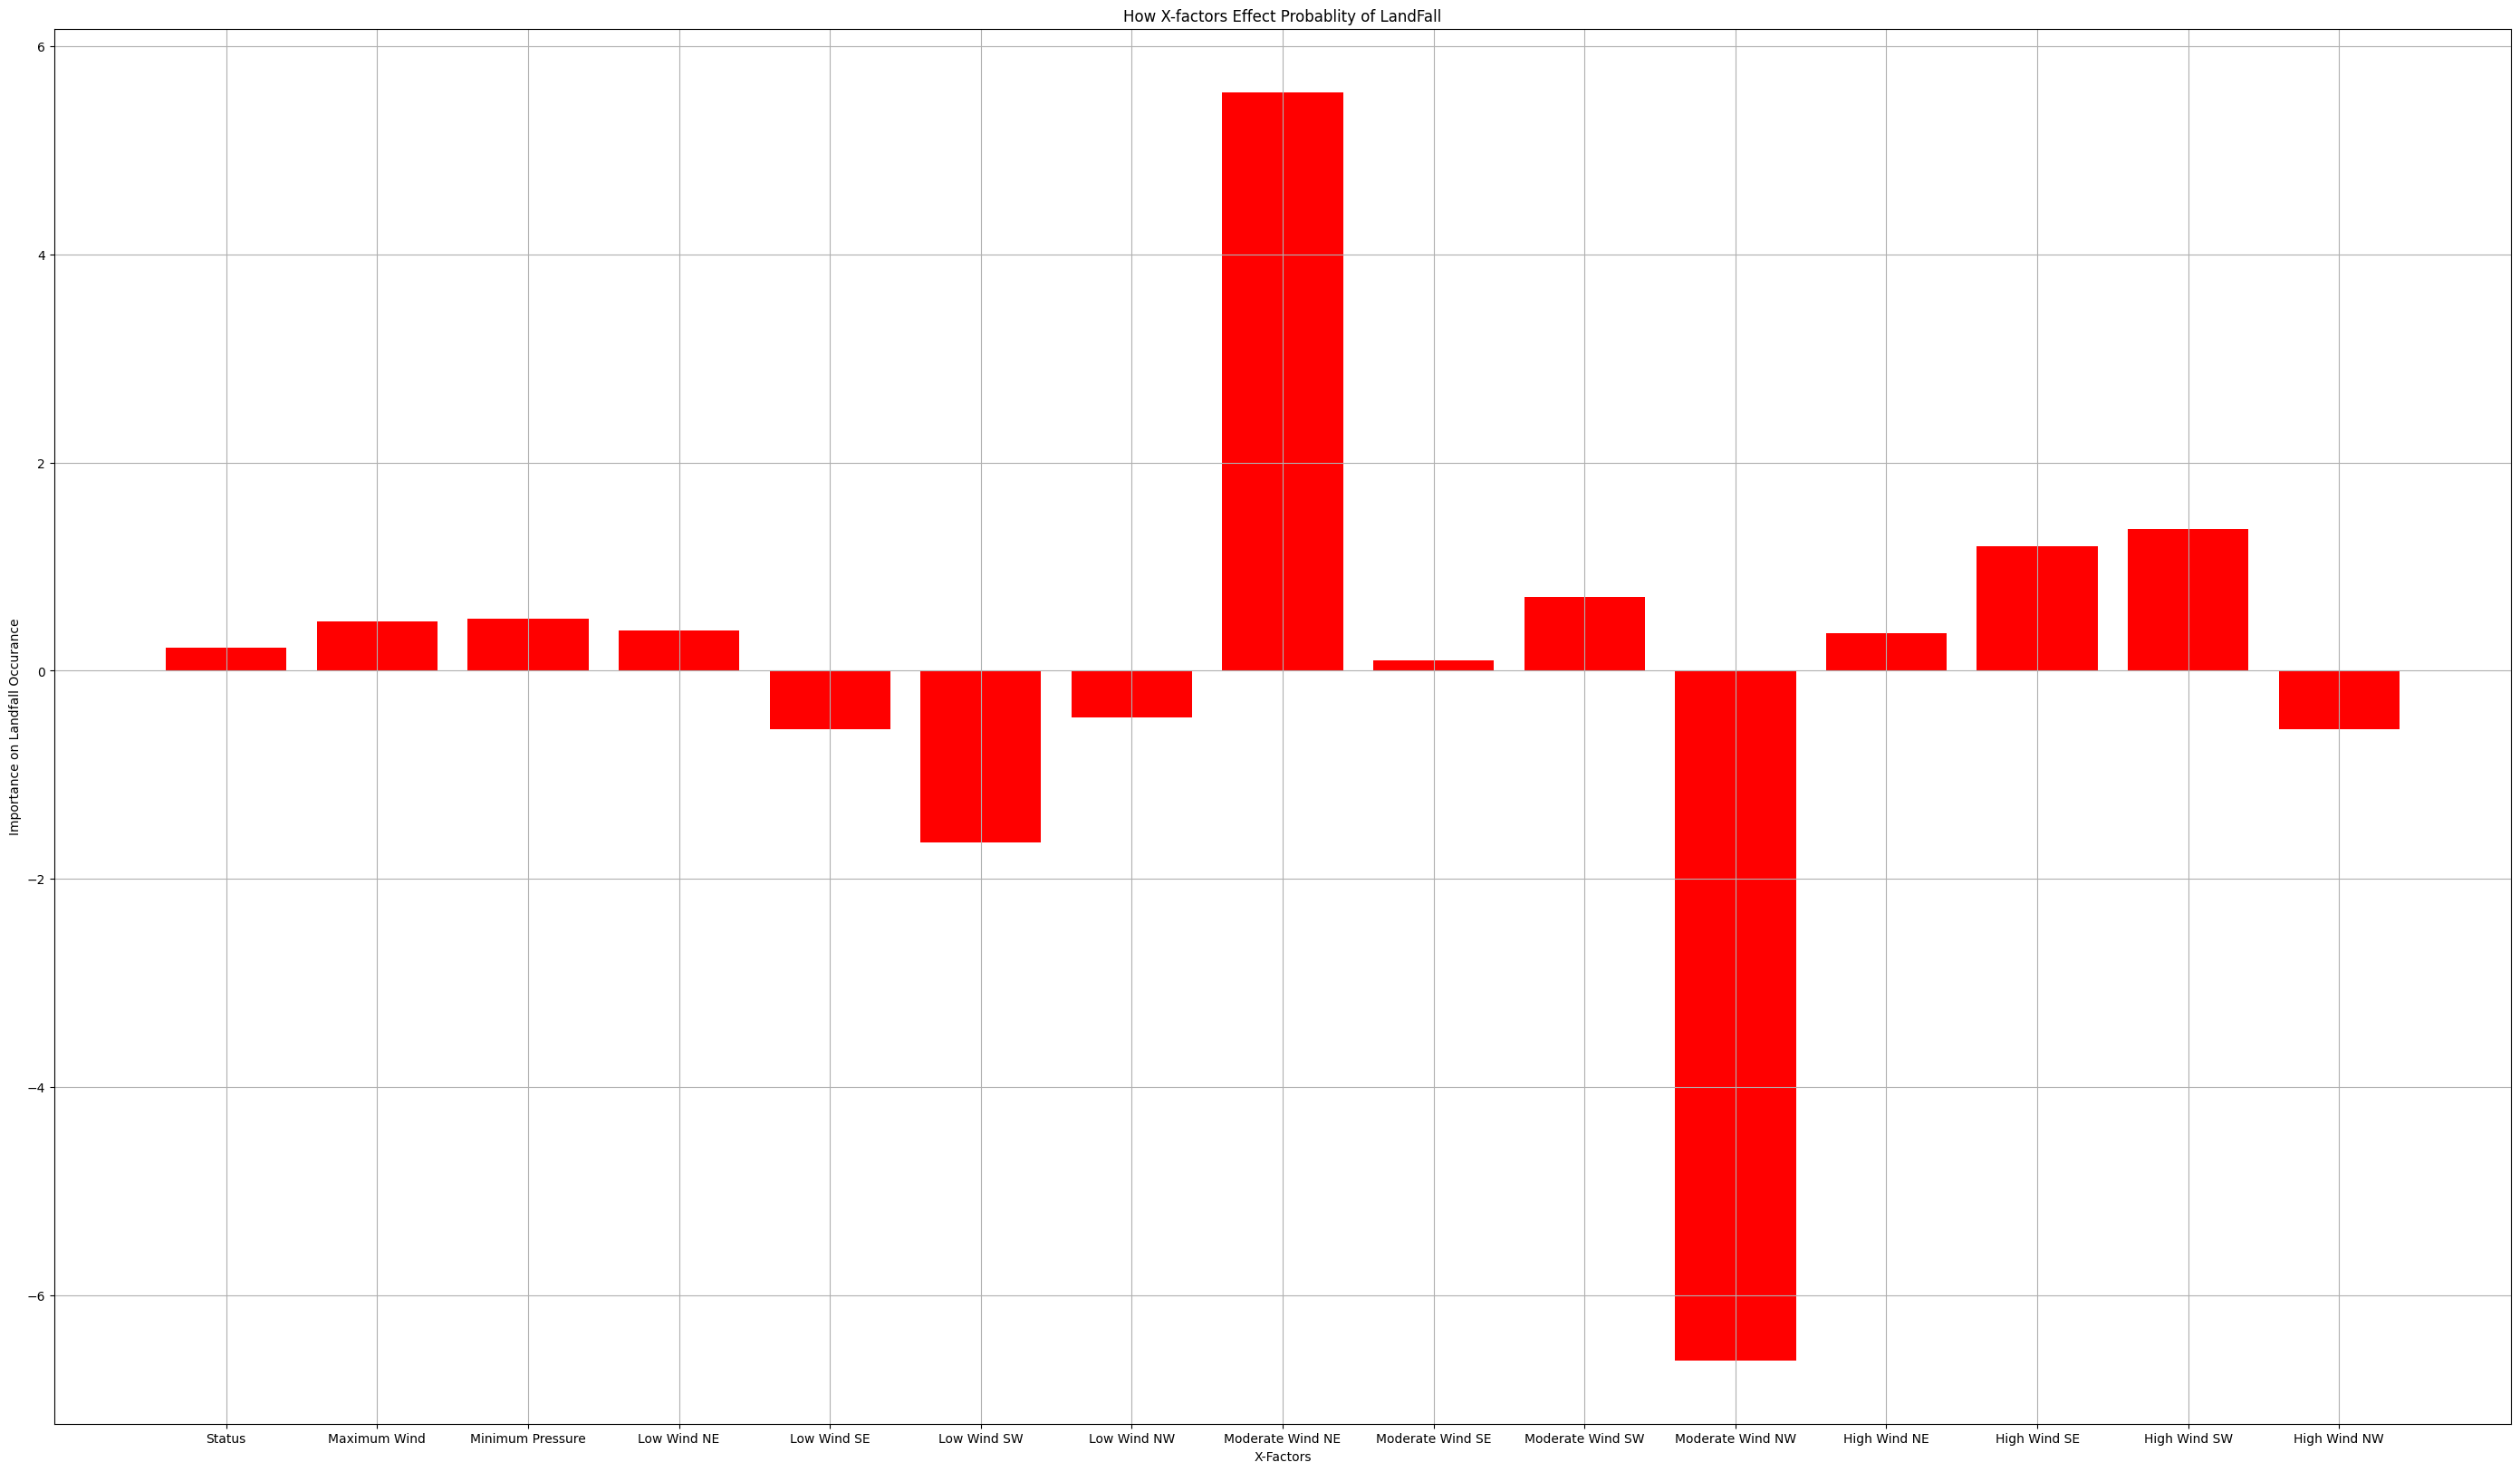

In [241]:
plt.figure(figsize=(10,8))
x_col = ['Status','Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW','High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']
y_col = 'Event'

X = HurriData[x_col].values
y = HurriData[y_col].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''
only 903/49105 rows have landfalls so I had to make the testing size larger 
& use imblearn for oversampling b/c just stratify spliting didn't work
'''

# Apply SMOTE(a type of data augmentation technique)
sm = SMOTE(random_state=42)
'''
initialize the RandomOverSampler
random state is how much it "shuffles" the data 0-42
'''

X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
#applying SMOTE to the features and target variable
'''
Fit: used to calc how the resampling will be done based on the X_scaled & y
resample: creating a balanced dataset by oversampling the minority class so it has basically
the same number of samples as the majority class
'''


# Now split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
)

'''
using train_test_split to split data and
stratifying helps to ensure the distribution of the target variable(y_resampled)... 
is similar  across the training and testing sets...
making the model better for handling all categories.
'''

#Check new class distribution
print("Resampled train class distribution:", np.bincount(y_train))
print("Resampled test class distribution:", np.bincount(y_test))

'''
SMOTE is better than oversampling because it generates new synthetic samples 
by interpolating between existing minority-class samples.

Also, it reduces overfitting which can be a problem with oversampling. 
Instead the model is able to generalize patterns instead of memorizing specific examples.
'''

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy After Oversampling: {accuracy:.4f}")

#visualization
importance = model.coef_[0]
#how each x-feature impacts landfall probalitiy

#bar chart
plt.figure(figsize= (35,20))
plt.bar(x_col, importance, color="red")
plt.xlabel("X-Factors")
plt.ylabel("Importance on Landfall Occurance")
plt.title("How X-factors Effect Probablity of LandFall")
plt.grid(True)
plt.show()

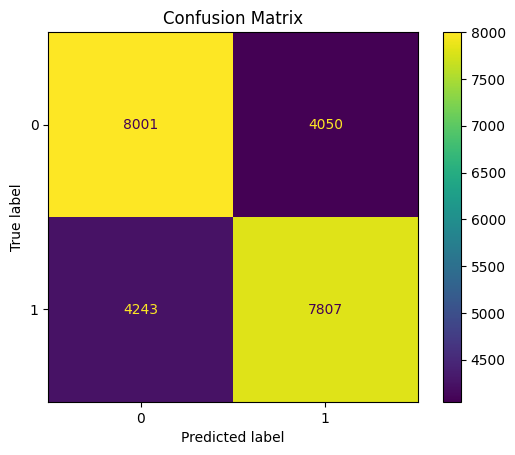

In [242]:
confusion = confusion_matrix(y_test, y_pred, labels=[0,1])
display = ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()
plt.title('Confusion Matrix')
plt.show()